In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Classes create for preprocessing and models
from preprocess.preprocess import MovieLens
from models.matrix_factorization import MF
from rec_sys.recsys import RecSys

In [3]:
ml = MovieLens()

In [4]:
n_users, n_items = ml.num_user_item()
model = MF(n_users, n_items, emb_dim=128, init=True)
model.to(device)
print(model)

MF(
  (user_emb): Embedding(610, 128)
  (item_emb): Embedding(9724, 128)
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [5]:
train_loader, test_loader = ml.dataset(batch_size=32)

In [13]:
train_losses, val_losses = model.fit(num_epochs=20, train_loader=train_loader, test_loader=test_loader)

epoch 1 loss batch: 0.7055187764747018
epoch 2 loss batch: 0.696772788066748
epoch 3 loss batch: 0.6878664431560191
epoch 4 loss batch: 0.681460846662101
epoch 5 loss batch: 0.6762412964499047
epoch 6 loss batch: 0.6719455452916989
epoch 7 loss batch: 0.6682397034938732
epoch 8 loss batch: 0.6652011275921957
epoch 9 loss batch: 0.662499630616187
epoch 10 loss batch: 0.6602096559561275
epoch 11 loss batch: 0.6580292610149457
epoch 12 loss batch: 0.6561384177878394
epoch 13 loss batch: 0.6549950699060525
epoch 14 loss batch: 0.6530428830802189
epoch 15 loss batch: 0.6517587239277379
epoch 16 loss batch: 0.6504847841082491
epoch 17 loss batch: 0.6493365290260785
epoch 18 loss batch: 0.6483936407123869
epoch 19 loss batch: 0.6473664321709419
epoch 20 loss batch: 0.6465591998988885


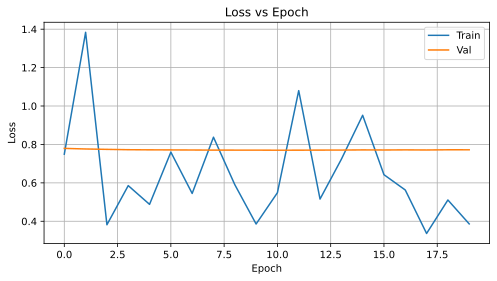

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Val')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend();

In [15]:
user_emb_min_w = model.user_emb.weight.min().item()
user_emb_max_w = model.user_emb.weight.max().item()
item_emb_min_w = model.item_emb.weight.min().item()
item_emb_max_w = model.item_emb.weight.max().item()

print(f'Emb user min/max w: {user_emb_min_w:0.3f} / {user_emb_max_w:0.3f}')
print(f'Emb item min/max w: {item_emb_min_w:0.3f} / {item_emb_max_w:0.3f}')
# print(f'Preds min/max: {y_ratings.min().item():0.2f} / {y_hat.max().item():0.2f}')
# print(f'Rating min/max: {yRatings.min().item():0.2f} / {yRatings.max().item():0.2f}')
# print(preds.detach().cpu().numpy()[:6])
# print(y_ratings.detach().cpu().numpy()[:6])

Emb user min/max w: -0.122 / 0.312
Emb item min/max w: -0.203 / 0.314


In [20]:
matrix = ml.get_matrix()
movies = ml.get_movies()
matrix.shape

(610, 9724)

In [21]:
user_ids, item_ids = ml.get_ids()

user_id = 5
rec_sys = RecSys(model, matrix, user_ids, item_ids, movies)
list_movies = rec_sys.make_recommendations(user_id)


In [22]:
print("Rank of recommendations for user: ", user_id)
for movie in list_movies:    
    print("Title: " + movie['movie_name'] + " Rating: " + str(movie['predicted_rating'].detach().cpu().numpy()))

Rank of recommendations for user:  5
Title: Belle époque (1992) Rating: 4.836171
Title: RKO 281 (1999) Rating: 4.8358955
Title: Buffy the Vampire Slayer (1992) Rating: 4.814419
Title: Papillon (1973) Rating: 4.7927184
Title: American Fable (2017) Rating: 4.768464
Title: Good Morning, Vietnam (1987) Rating: 4.765777
Title: Der Herr Karl (1961) Rating: 4.7061896
Title: Boys of Baraka, The (2005) Rating: 4.7031417
Title: Big Blue, The (Grand bleu, Le) (1988) Rating: 4.699174
Title: Rebel Without a Cause (1955) Rating: 4.6846476


In [23]:
rmse = model.calculate_rmse(test_loader)
print(f"RMSE: {rmse}")

RMSE: 0.8787419939051233
